# Embeddings Demo

See <a href="https://learn.deeplearning.ai/courses/embedding-models-from-architecture-to-implementation/lesson/vu3si/introduction">Embedding Models: from Architecture to Implementation</a> for excellent overview

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import torch

from sklearn.metrics.pairwise import cosine_similarity

## GloVe word embeddings

GloVe (Global Vectors for Word Representation) is an unsupervised learning algorithm that converts words into numerical vectors called embeddings by analyzing how often words co-occur in a large text corpus. It differs from other methods by explicitly using global word-word co-occurrence statistics, which are compiled into a matrix. This matrix-based approach allows the model to learn vectors that capture semantic relationships between words, such as "king" and "queen," because they tend to appear in similar contexts. 

In [4]:
# !pip install --upgrade gensim

In [5]:
#get the word embeddings
import gensim.downloader as api
word_vectors = api.load('glove-wiki-gigaword-100')
#word_vectors = api.load('word2vec-google-news-300')

In [6]:
dir(word_vectors )

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adapt_by_suffix',
 '_load_specials',
 '_log_evaluate_word_analogies',
 '_save_specials',
 '_smart_save',
 '_upconvert_old_d2vkv',
 '_upconvert_old_vocab',
 'add_lifecycle_event',
 'add_vector',
 'add_vectors',
 'allocate_vecattrs',
 'closer_than',
 'cosine_similarities',
 'distance',
 'distances',
 'doesnt_match',
 'evaluate_word_analogies',
 'evaluate_word_pairs',
 'expandos',
 'fill_norms',
 'get_index',
 'get_mean_vector',
 'get_normed_vectors',
 'get_vecattr',
 'get_vector',
 'has_index_for',
 'index2entity',
 'index2word',
 'index_to_key'

In [7]:
print(f"Number tokens in vocabulary: {len(word_vectors)}")
print(f"Vector size: {word_vectors.vector_size}")

Number tokens in vocabulary: 400000
Vector size: 100


In [7]:
#whats the most similar words to 'king'?
word_vectors.most_similar('king', topn=5)

[('prince', 0.7682328820228577),
 ('queen', 0.7507690787315369),
 ('son', 0.7020888328552246),
 ('brother', 0.6985775232315063),
 ('monarch', 0.6977890729904175)]

In [8]:
word_vectors['king'].shape

(100,)

In [9]:
word_vectors['king'][:20]

array([-0.32307 , -0.87616 ,  0.21977 ,  0.25268 ,  0.22976 ,  0.7388  ,
       -0.37954 , -0.35307 , -0.84369 , -1.1113  , -0.30266 ,  0.33178 ,
       -0.25113 ,  0.30448 , -0.077491, -0.89815 ,  0.092496, -1.1407  ,
       -0.58324 ,  0.66869 ], dtype=float32)

In [10]:
# Words to visualize
words = ["king", "princess", "monarch", "throne", "crown", 
         "mountain", "ocean", "tv", "rainbow", "cloud", "queen"]

# Get word vectors
vectors = np.array([word_vectors[word] for word in words])

In [11]:
# Reduce dimensions using PCA- this will crunch the 100-d vectors down to 2-d
# PCA is a linear algorithm that works well for simplifying high dimensional data
# Other options include t-SNE and UMAP, which are non-linear algorithms
pca = PCA(n_components=2)
vectors_pca = pca.fit_transform(vectors)

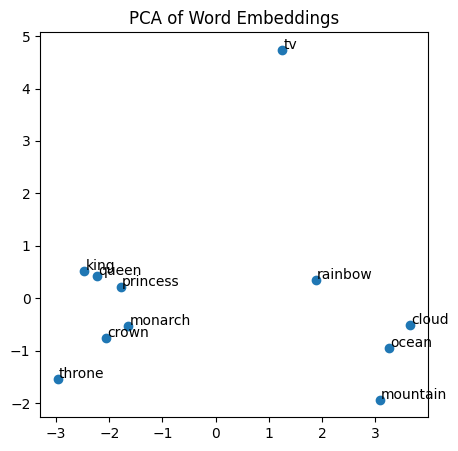

In [12]:
# Plotting
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
axes.scatter(vectors_pca[:, 0], vectors_pca[:, 1])
for i, word in enumerate(words):
    axes.annotate(word, (vectors_pca[i, 0]+.02, vectors_pca[i, 1]+.02))
axes.set_title('PCA of Word Embeddings')
plt.show()

## GloVe algebra

These embeddings are located in a 100 dimensional vector space.<br>
You can do vector arithmatic with them, the following 

In [13]:
#info on
word_vectors.most_similar??

Signature:
word_vectors.most_similar(
    positive=None,
    negative=None,
    topn=10,
    clip_start=0,
    clip_end=None,
    restrict_vocab=None,
    indexer=None,
)
Source:   
    def most_similar(
            self, positive=None, negative=None, topn=10, clip_start=0, clip_end=None,
            restrict_vocab=None, indexer=None,
        ):
        """Find the top-N most similar keys.
        Positive keys contribute positively towards the similarity, negative keys negatively.

        This method computes cosine similarity between a simple mean of the projection
        weight vectors of the given keys and the vectors for each key in the model.
        The method corresponds to the `word-analogy` and `distance` scripts in the original
        word2vec implementation.

        Parameters
        ----------
        positive : list of (str or int or ndarray) or list of ((str,float) or (int,float) or (ndarray,float)), optional
            List of keys that contribute positively. If t

In [14]:
result = word_vectors.most_similar(positive=['king', 'woman'], 
                                   negative=['man'], topn=1)

# Output the result
print(f"""
    The word closest to 'king' - 'man' + 'woman' is: '{result[0][0]}' 
    with a similarity score of {result[0][1]}""")


    The word closest to 'king' - 'man' + 'woman' is: 'queen' 
    with a similarity score of 0.7698540687561035


In [15]:
print(word_vectors.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


In [ ]:
# !pip install POT

In [8]:
sentence_a = 'The bat flew'.lower().split()
sentence_b = 'The bat swung'.lower().split()
similarity = word_vectors.wmdistance(sentence_a, sentence_b)
print(f"{similarity:.4f}")

2025-10-15 16:31:43.761518: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


0.3873


## GloVe vs BERT: words in context

In [ ]:
# !pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 24.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 30.1 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.4
    Uninstalling tokenizers-0.21.4:
      Successfully uninstalled tokenizers-0.21.4


In [9]:
from transformers import BertTokenizer, BertModel

# Initialize the uncased tokenizer for a pre-trained BERT model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


model = BertModel.from_pretrained('bert-base-uncased')

# Function to get BERT embeddings
def get_bert_embeddings(sentence, word):
    inputs = tokenizer(sentence, return_tensors='pt')
    outputs = model(**inputs)
    last_hidden_states = outputs.last_hidden_state
    word_tokens = tokenizer.tokenize(sentence)
    word_index = word_tokens.index(word)
    word_embedding = last_hidden_states[0, word_index + 1, :]  # +1 to account for [CLS] token
    return word_embedding

In [10]:
sentence1 = "The bat flew out of the cave at night."
sentence2 = "He swung the bat and hit a home run."

word = "bat"

bert_embedding1 = get_bert_embeddings(sentence1, word).detach().numpy()
bert_embedding2 = get_bert_embeddings(sentence2, word).detach().numpy()
word_embedding = word_vectors[word]

In [11]:
print("BERT Embedding for 'bat' in sentence 1:", bert_embedding1[:5])
print("BERT Embedding for 'bat' in sentence 2:", bert_embedding2[:5])
print("GloVe Embedding for 'bat':", word_embedding[:5])

bert_similarity = cosine_similarity([bert_embedding1], [bert_embedding2])[0][0]
word_embedding_similarity = cosine_similarity([word_embedding], [word_embedding])[0][0]

print()
print(f"Cosine Similarity between BERT embeddings in different contexts: {bert_similarity}")
print(f"Cosine Similarity between GloVe embeddings: {word_embedding_similarity}")


BERT Embedding for 'bat' in sentence 1: [ 0.41316146 -0.12908158 -0.44865748 -0.40492642 -0.15305704]
BERT Embedding for 'bat' in sentence 2: [ 0.6406692  -0.31121552 -0.4408984  -0.1655114  -0.20056124]
GloVe Embedding for 'bat': [-0.47601  0.81705  0.11151 -0.22687 -0.80672]

Cosine Similarity between BERT embeddings in different contexts: 0.459957480430603
Cosine Similarity between GloVe embeddings: 1.0
